In [35]:
import json

import matplotlib.pyplot as plt
import numpy as np

In [36]:
with open("aggregated.json") as f:
    data = json.loads(f.read())

## How often are benchmarks not cited?

In [37]:
def used_any_benchmark(d):
    not_custom = [s for s in d["whichdata"] if s != "custom" and s != "custom simulated"]
    return len(not_custom) > 0

ub = 0
ubnc = 0
for d in data:
    if used_any_benchmark(d):
        ub = ub + 1
        if d["didcite"] != "all" and d["didcite"] != "":
            ubnc = ubnc + 1
        if d["didcite"] == "":
            print(d["ind"], "needs filling")
            
print(ub, "papers found that used a benchmark")
print(ubnc, "of those missed or improperly cited at least one of those benchmarks")
print("That's {:0.1f} per cent!".format(100*ubnc/ub))

108 needs filling
132 papers found that used a benchmark
35 of those missed or improperly cited at least one of those benchmarks
That's 26.5 per cent!


## How often is custom data used?

In [38]:
def used_custom_data(d):
    not_custom = [s for s in d["whichdata"] if s == "custom" or s == "custom simulated"]
    return len(not_custom) > 0

du = 0
dure = 0
for d in data:
    if used_custom_data(d):
        du = du + 1
        if d["didpublish"] != "no" and d["didpublish"] != "":
            dure = dure + 1
        if d["didpublish"] == "":
            print(d["ind"], "needs filling")
            
print(du, "papers found that used custom data")
print(dure, "of those released or promised to release their data")
print("That's {:0.1f} per cent!".format(100*dure/du))

2 needs filling
73 needs filling
102 needs filling
167 needs filling
321 needs filling
362 needs filling
170 papers found that used custom data
6 of those released or promised to release their data
That's 3.5 per cent!


## How often are MICCAI papers cited?

65 needs reviewing
87 needs reviewing
166 needs reviewing
[243.66666667]


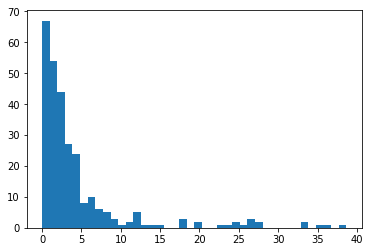

5.364166666666667


In [46]:
citations = []
for d in data:
    if used_custom_data(d) or used_any_benchmark(d):
        try:
            citations = citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
            
cits = np.sort(np.array(citations))
print(cits[cits > 100])
plt.hist(cits[cits <= 100], bins=40)
plt.show()
print(np.mean(cits))

## What if we partition by benchmark vs custom?

65 needs reviewing
87 needs reviewing
166 needs reviewing
Excluding... []


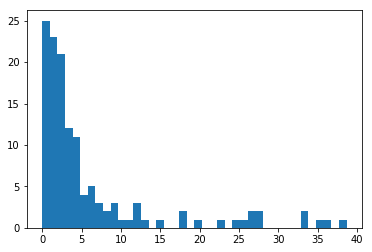

6.010050890585242
Excluding... [243.66666667]


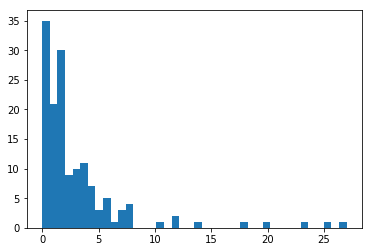

3.1823198198198197


In [50]:
bnch_citations = []
cstm_citations = []
for d in data:
    if used_any_benchmark(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_data(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()
print(np.mean(bnch_cits[bnch_cits <= 100]))

# Then custom
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()
print(np.mean(cstm_cits[cstm_cits <= 100]))